In [2]:
import pandas as pd
import numpy as np
import datasist as ds
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('ttwitter_model.xlsx')
pd.options.display.float_format = '{:.2f}%'.format

In [4]:
df.head()

,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
0,Wed Apr 08 04:22:36 +0000 2020,NEUTRAL,COVID-19: How it might change us in the future...,neutral,both,neutral
1,Wed Apr 08 04:22:36 +0000 2020,NEGATIVE,"As a GP, I fear our Covid-19 lockdown will res...",neutral,comprehend,negative
2,Wed Apr 08 04:22:36 +0000 2020,NEUTRAL,Coronavirus lockdown complicates Philippines's...,neutral,none,negative
3,Wed Apr 08 04:22:36 +0000 2020,NEGATIVE,So in less then a week once COVID-19 deaths in...,neutral,comprehend,negative
4,Wed Apr 08 04:22:35 +0000 2020,NEUTRAL,"Hmmm, something is off here... https://t.co/qH...",neutral,both,neutral


In [5]:
df.shape

(1455, 6)

In [6]:
df.isnull().sum()

created_at           0
Amazon_comprehend    0
full_text            0
Custom_model         0
model_accuracy       0
Sentiment_label      0
dtype: int64

In [7]:
df['model_accuracy'].unique()

array(['both', 'comprehend', 'none', 'custom model'], dtype=object)

In [8]:
df['Sentiment_label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [9]:
df['Amazon_comprehend']=df['Amazon_comprehend'].str.lower() 
df

,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
0,Wed Apr 08 04:22:36 +0000 2020,neutral,COVID-19: How it might change us in the future...,neutral,both,neutral
1,Wed Apr 08 04:22:36 +0000 2020,negative,"As a GP, I fear our Covid-19 lockdown will res...",neutral,comprehend,negative
2,Wed Apr 08 04:22:36 +0000 2020,neutral,Coronavirus lockdown complicates Philippines's...,neutral,none,negative
3,Wed Apr 08 04:22:36 +0000 2020,negative,So in less then a week once COVID-19 deaths in...,neutral,comprehend,negative
4,Wed Apr 08 04:22:35 +0000 2020,neutral,"Hmmm, something is off here... https://t.co/qH...",neutral,both,neutral
...,...,...,...,...,...,...
1450,Sat Apr 11 18:20:22 +0000 2020,neutral,Whitmer's not the only one who is power-mad. ‘...,negative,comprehend,neutral
1451,Sat Apr 11 18:20:22 +0000 2020,neutral,Thinking of everyone dealing with Covid-19 in ...,neutral,both,neutral
1452,Sat Apr 11 18:20:21 +0000 2020,neutral,@paulisci You could have bought Johnny Walker ...,neutral,both,neutral
1453,Sat Apr 11 18:20:21 +0000 2020,positive,Leviathan Wakes is oddly VERY applicable to th...,neutral,custom model,neutral


In [10]:
ds.structdata.describe(df)

First five data points


,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
0,Wed Apr 08 04:22:36 +0000 2020,neutral,COVID-19: How it might change us in the future...,neutral,both,neutral
1,Wed Apr 08 04:22:36 +0000 2020,negative,"As a GP, I fear our Covid-19 lockdown will res...",neutral,comprehend,negative
2,Wed Apr 08 04:22:36 +0000 2020,neutral,Coronavirus lockdown complicates Philippines's...,neutral,none,negative
3,Wed Apr 08 04:22:36 +0000 2020,negative,So in less then a week once COVID-19 deaths in...,neutral,comprehend,negative
4,Wed Apr 08 04:22:35 +0000 2020,neutral,"Hmmm, something is off here... https://t.co/qH...",neutral,both,neutral




Random five data points


,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
166,Wed Apr 08 07:21:07 +0000 2020,positive,@AYCOMEDIAN More blessing bro AY 3050037982 Po...,neutral,comprehend,positive
836,Wed Apr 08 22:14:53 +0000 2020,positive,What you believe works for you #seeisbelieving...,neutral,custom model,neutral
504,Wed Apr 08 14:20:32 +0000 2020,negative,@SuzBrockmann We were sick in Jan too. I thoug...,neutral,custom model,neutral
1446,Sat Apr 11 18:20:23 +0000 2020,neutral,@wegouptygodwn @JackPosobiec If COVID-19 takes...,neutral,both,neutral
875,Wed Apr 08 22:21:38 +0000 2020,neutral,@MobilePunch We gave the demons the access to ...,negative,custom model,negative




Last five data points


,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
1450,Sat Apr 11 18:20:22 +0000 2020,neutral,Whitmer's not the only one who is power-mad. ‘...,negative,comprehend,neutral
1451,Sat Apr 11 18:20:22 +0000 2020,neutral,Thinking of everyone dealing with Covid-19 in ...,neutral,both,neutral
1452,Sat Apr 11 18:20:21 +0000 2020,neutral,@paulisci You could have bought Johnny Walker ...,neutral,both,neutral
1453,Sat Apr 11 18:20:21 +0000 2020,positive,Leviathan Wakes is oddly VERY applicable to th...,neutral,custom model,neutral
1454,Sat Apr 11 18:20:20 +0000 2020,neutral,@CharlieDonahue4 @Sparknottle @MagaRosco @iamd...,neutral,both,neutral




Shape of  data set: (1455, 6)


Size of  data set: 8730


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
created_at,object
Amazon_comprehend,object
full_text,object
Custom_model,object
model_accuracy,object
Sentiment_label,object




Numerical Features in Data set
[]


Categorical Features in Data set


['created_at\xa0\xa0',
 'Amazon_comprehend',
 'full_text',
 'Custom_model',
 'model_accuracy',
 'Sentiment_label']



Statistical Description of Columns


,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
count,1455,1455,1455,1455,1455,1455
unique,1202,4,1452,3,4,3
top,Sat Apr 11 14:22:33 +0000 2020,neutral,@officialdeezell 3031990387 POLARIS BANK PLEAS...,neutral,both,neutral
freq,7,1030,2,1235,981,1082




Description of Categorical Features


,count,unique,top,freq
created_at,1455,1202,Sat Apr 11 14:22:33 +0000 2020,7
Amazon_comprehend,1455,4,neutral,1030
full_text,1455,1452,@officialdeezell 3031990387 POLARIS BANK PLEAS...,2
Custom_model,1455,3,neutral,1235
model_accuracy,1455,4,both,981
Sentiment_label,1455,3,neutral,1082




Unique class Count of Categorical features


,Feature,Unique Count
0,created_at,1202
1,Amazon_comprehend,4
2,full_text,1452
3,Custom_model,3
4,model_accuracy,4
5,Sentiment_label,3




Missing Values in Data


,features,missing_counts,missing_percent
0,created_at,0,0.00%
1,Amazon_comprehend,0,0.00%
2,full_text,0,0.00%
3,Custom_model,0,0.00%
4,model_accuracy,0,0.00%
5,Sentiment_label,0,0.00%


In [11]:
Accuracy_count=df['model_accuracy'].value_counts()

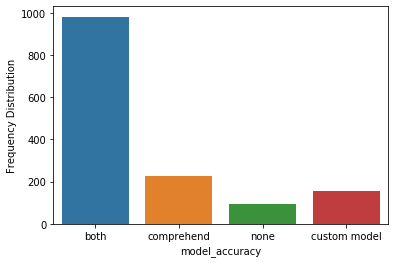

In [12]:
sns.countplot(df['model_accuracy'])
plt.xlabel("model_accuracy")
plt.ylabel("Frequency Distribution")
plt.show()

In [11]:
total_sentiment_count=df['model_accuracy'].count()

In [12]:
Percentage_Accuracy=(Accuracy_count/total_sentiment_count)*100
Percentage_Accuracy

both           67.42%
comprehend     15.46%
custom model   10.65%
none            6.46%
Name: model_accuracy, dtype: float64

In [13]:
df['Sentiment_label'].value_counts()

neutral     1082
negative     219
positive     154
Name: Sentiment_label, dtype: int64

In [14]:
df['Amazon_comprehend'].value_counts()

NEUTRAL     1030
POSITIVE     222
NEGATIVE     200
MIXED          3
Name: Amazon_comprehend, dtype: int64

In [15]:
df['Custom_model'].value_counts()

neutral     1235
negative     117
positive     103
Name: Custom_model, dtype: int64

In [16]:
df3=df[:1000]
df3.shape

(1000, 6)

In [17]:
df3.index +=1

In [18]:
df3.index = df3.index.rename('id')

In [20]:
df3 = df3.astype(str)

In [23]:
df3['Amazon_comprehend'].astype(str)

id
1        NEUTRAL
2       NEGATIVE
3        NEUTRAL
4       NEGATIVE
5        NEUTRAL
          ...   
996     NEGATIVE
997      NEUTRAL
998      NEUTRAL
999      NEUTRAL
1000    POSITIVE
Name: Amazon_comprehend, Length: 1000, dtype: object

In [26]:
df3['Amazon_comprehend'].dtypes

dtype('O')

In [32]:
# df3['Amazon_comprehend']=df3['Amazon_comprehend'].str.lower() 
# df3

,created_at,Amazon_comprehend,full_text,Custom_model,model_accuracy,Sentiment_label
id,,,,,,
1,Wed Apr 08 04:22:36 +0000 2020,neutral,COVID-19: How it might change us in the future...,neutral,both,neutral
2,Wed Apr 08 04:22:36 +0000 2020,negative,"As a GP, I fear our Covid-19 lockdown will res...",neutral,comprehend,negative
3,Wed Apr 08 04:22:36 +0000 2020,neutral,Coronavirus lockdown complicates Philippines's...,neutral,none,negative
4,Wed Apr 08 04:22:36 +0000 2020,negative,So in less then a week once COVID-19 deaths in...,neutral,comprehend,negative
5,Wed Apr 08 04:22:35 +0000 2020,neutral,"Hmmm, something is off here... https://t.co/qH...",neutral,both,neutral
...,...,...,...,...,...,...
996,Sat Apr 11 04:19:42 +0000 2020,negative,Coronavirus becomes number one cause of death ...,neutral,both,negative
997,Sat Apr 11 04:19:42 +0000 2020,neutral,Trump Administration Knocked Back $100M Virus ...,neutral,both,neutral
998,Sat Apr 11 04:19:38 +0000 2020,neutral,Yesterday I saw a young man do pull ups on the...,neutral,both,neutral


In [29]:
# s.str.lower()

id
1        neutral
2       negative
3        neutral
4       negative
5        neutral
          ...   
996     negative
997      neutral
998      neutral
999      neutral
1000    positive
Name: Amazon_comprehend, Length: 1000, dtype: object

In [30]:
# s

id
1        NEUTRAL
2       NEGATIVE
3        NEUTRAL
4       NEGATIVE
5        NEUTRAL
          ...   
996     NEGATIVE
997      NEUTRAL
998      NEUTRAL
999      NEUTRAL
1000    POSITIVE
Name: Amazon_comprehend, Length: 1000, dtype: object

In [ ]:
# df3.drop("created_at", axis=1, inplace=True)

In [19]:
# df3.to_csv('tweetx.csv', index='id')

In [ ]:
# df4 = pd.read_csv('tweetx.csv')
# df4.head()

In [ ]:
# df4 = df4.astype(str)

In [ ]:
# df4['Amazon_comprehend'].dtypes()